In [2]:
import json
import os
import sys
import numpy as np
from umap import UMAP
from datetime import datetime
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from metrics import get_geometric_metrics, plot_convex_hull



In [3]:
data = json.load(open('../resultados/result.json', 'r'))
embeddings = np.array(data['embeddings_original'])
embeddings = embeddings.reshape(-1, embeddings.shape[-1])
embeddings.shape

(293, 4096)

In [4]:

embeddings2 = np.array([embeddings, embeddings])
print(293 + 293)
embeddings2 = embeddings2.reshape(-1, embeddings2.shape[-1])
# embeddings.reshape(-1, embeddings.shape[-1]).shape
print(embeddings2.shape)
print(embeddings2[0])
print(embeddings2[293])

586
(586, 4096)
[ 0.2878418  -0.07458496  0.01417542 ...  0.01701355  0.00072098
  0.03753662]
[ 0.2878418  -0.07458496  0.01417542 ...  0.01701355  0.00072098
  0.03753662]


In [5]:
dimensionality_reduction_model = UMAP(n_components=9,  verbose=True)
embeddings = embeddings2
dimensionality_reduction_model.fit(embeddings)
reduced_embeddings = dimensionality_reduction_model.transform(embeddings)

get_geometric_metrics(reduced_embeddings)


UMAP(n_components=9, verbose=True)
Mon Jan  8 20:33:09 2024 Construct fuzzy simplicial set
Mon Jan  8 20:33:10 2024 Finding Nearest Neighbors
Mon Jan  8 20:33:12 2024 Finished Nearest Neighbor Search
Mon Jan  8 20:33:15 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Jan  8 20:33:18 2024 Finished embedding
Getting Metrics:
	 Centroid...OK
	 Centroid...OK
	 ConvexHull...OK


{'mean_distance': 4.718046070754515,
 'volume': 653.5548355693237,
 'area': 6697.919766236665}

In [6]:
dimensionality_reduction_model = UMAP(n_components=2,  verbose=True)
embeddings = embeddings2
dimensionality_reduction_model.fit(embeddings)
reduced_embeddings = dimensionality_reduction_model.transform(embeddings)

UMAP( verbose=True)
Mon Jan  8 20:34:41 2024 Construct fuzzy simplicial set
Mon Jan  8 20:34:42 2024 Finding Nearest Neighbors
Mon Jan  8 20:34:42 2024 Finished Nearest Neighbor Search
Mon Jan  8 20:34:42 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Jan  8 20:34:44 2024 Finished embedding


Creating Convex Hull...


Text(30.972222222222214, 0.5, 'UMAP Dimension 2')

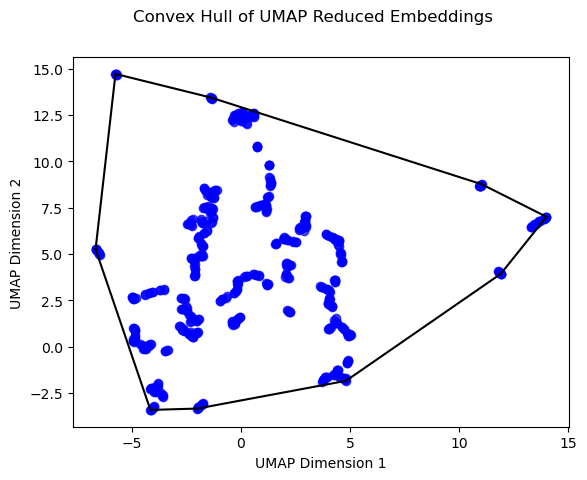

In [7]:
fig , ax = plot_convex_hull(
    reduced_embeddings, 
    path=f"../resultados/hull_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png")

fig.suptitle('Convex Hull of UMAP Reduced Embeddings')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')

Creating Convex Hull...
Creating Convex Hull...


Text(0, 0.5, 'UMAP Dimension 2')

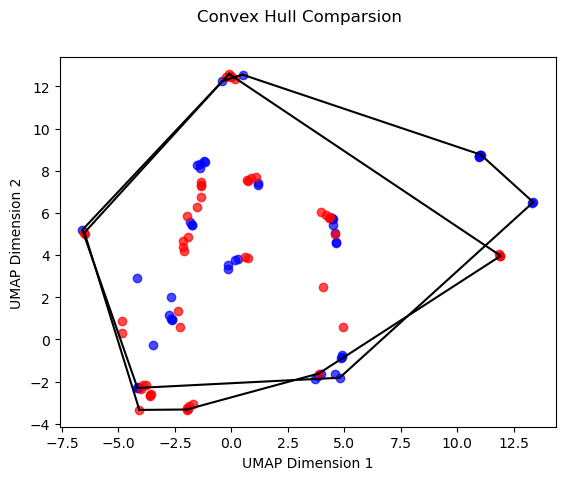

In [20]:
import matplotlib.pyplot as plt

emb1 = reduced_embeddings[:50, :]
emb2 = reduced_embeddings[100:150, :]

fig , ax = plt.subplots()
 
plot_convex_hull(emb1, savefig=False, ax=ax)
plot_convex_hull(emb2, savefig=False, ax=ax, color="red")

fig.suptitle('Convex Hull Comparsion')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')